In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [2]:
train_df = pd.read_csv("coefficient_serie_ei.csv")

In [3]:
train_X = train_df.iloc[0:4,1:61]
train_y_letters = train_df.iloc[:,0:1]
data = train_X.to_numpy()
leng_chain=869

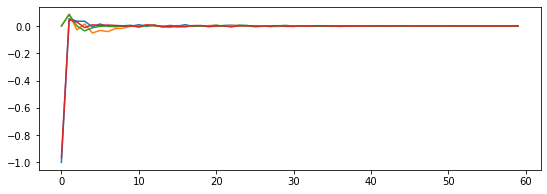

In [4]:
plt.figure(figsize=(9, 3))
plt.plot(data[0,:])
plt.plot(data[1,:])
plt.plot(data[2,:])
plt.plot(data[3,:])
plt.show()

In [5]:
data[0,:]

array([-1.00e+00,  5.44e-02,  3.54e-02,  3.53e-02, -5.60e-03,  1.49e-02,
       -2.70e-03, -2.30e-03, -1.30e-03, -1.70e-03,  9.80e-03, -1.60e-03,
        6.50e-03, -4.20e-03,  4.40e-03, -1.00e-03,  1.01e-02, -2.80e-03,
        2.70e-03, -1.80e-03, -2.20e-03,  4.40e-03,  5.70e-03,  1.80e-03,
        3.80e-03, -2.80e-03, -1.30e-03, -1.80e-03, -2.40e-03,  0.00e+00,
       -2.50e-03,  1.60e-03,  2.00e-04, -1.20e-03, -8.00e-04, -2.10e-03,
       -2.00e-04,  1.20e-03,  1.00e-03,  1.10e-03,  1.00e-04,  2.00e-04,
        1.30e-03, -2.00e-04,  1.40e-03, -8.00e-04,  0.00e+00,  8.00e-04,
        1.00e-03,  1.00e-04,  6.00e-04,  1.00e-03,  3.00e-04,  1.50e-03,
       -5.00e-04,  4.00e-04, -7.00e-04, -4.00e-04, -5.00e-04, -1.00e-03])

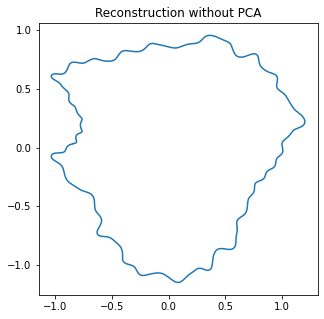

In [6]:
A0=0
C0=0
recon=np.zeros((leng_chain,2))
for t in range(leng_chain):
    x = 0.0
    y = 0.0
    for ii in range(60):
        x = x + (data[0,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + data[1,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
        y = y + (data[2,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) /leng_chain) + data[3,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
    recon[t,0] = A0 + x
    recon[t,1] = C0 + y 
# print(recon[0:9,:])    
plt.figure(figsize=(5, 5))   
plt.plot(recon[:,0], recon[:,1]);   
plt.title('Reconstruction without PCA')
plt.show()   


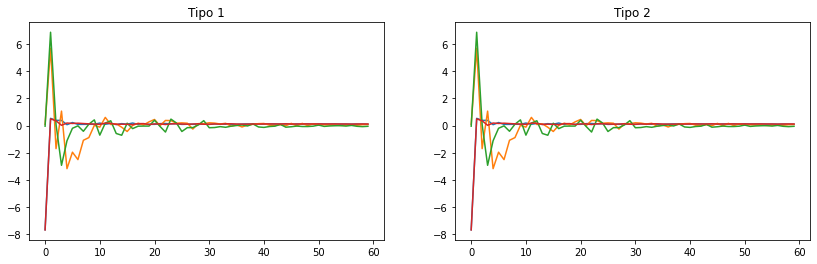

In [7]:
##Estandarización tipo 1
arr=data
# arr=arr.T
scaler = StandardScaler()
scaler.fit(arr.T)
arr_std=scaler.transform(arr.T)
# arr_std=preprocessing.scale(arr.T))
scaler = preprocessing.StandardScaler().fit(arr.T)
fig = plt.figure(figsize = (14,4))

a = fig.add_subplot(1, 2, 1)
a.set_title('Tipo 1')
plt.plot(arr_std[:,0])
plt.plot(arr_std[:,1])
plt.plot(arr_std[:,2])
plt.plot(arr_std[:,3])


##Estandarización tipo 2
arr_std2=StandardScaler().fit_transform(arr.T)
b = fig.add_subplot(1, 2, 2)
b.set_title('Tipo 2')
plt.plot(arr_std2[:,0])
plt.plot(arr_std2[:,1])
plt.plot(arr_std2[:,2])
plt.plot(arr_std2[:,3])
plt.show()


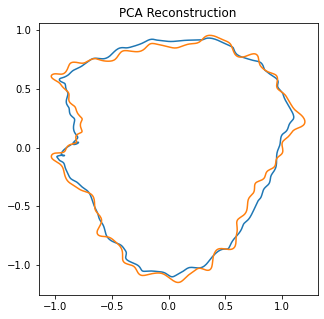

In [9]:
#pca = PCA(n_components=4)
pca = PCA(n_components=2,svd_solver='full')
pca.fit(arr_std)
pca_data=pca.transform(arr_std)
# print (pca.explained_variance_)
# print (pca.explained_variance_ratio_)
# print (pca.explained_variance_ratio_.cumsum())

eigenvectores=pca.components_
eigenvalores=pca.singular_values_
# per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
# labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
# plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

reco=pca.inverse_transform(pca_data)
reco=scaler.inverse_transform(reco)
# print(reco.shape)

reco=reco.T
A0=0
C0=0
recon2=np.zeros((leng_chain,2))
for t in range(leng_chain):
    x = 0.0
    y = 0.0
    for ii in range(60):
        x = x + (reco[0,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + reco[1,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
        y = y + (reco[2,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) /leng_chain) + reco[3,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
    recon2[t,0] = A0 + x
    recon2[t,1] = C0 + y 
# print(recon[0:9,:])    
plt.figure(figsize=(5, 5))   
plt.plot(recon2[:,0], recon2[:,1]);  
plt.plot(recon[:,0], recon[:,1]);  
plt.title('PCA Reconstruction')
plt.show() 
